In [1]:
import pandas as pd

df = pd.read_json("released_dataset/training-dataset.jsonl", lines=True)

df

,profile,posts
0,"{'username': 'deparmedya', 'id': '3170700063',...",[{'caption': 'Cumhuriyetimizin 100.yılı kutlu ...
1,"{'username': 'beyazyakaliyiz', 'id': '86344574...",[{'caption': 'Bu diyaloğun yaşanmadığı bir onl...
2,"{'username': 'kafesfirin', 'id': '266439571', ...",[{'caption': 'Bugün bir fincan köpüklü Türk ka...
3,"{'username': 'vimerang', 'id': '2367195567', '...",[{'caption': 'Saygı ve özlemle🖤 #atatürk #10k...
4,"{'username': 'totalenergies_istasyonlari', 'id...",[{'caption': 'Başöğretmenimiz Gazi Mustafa Kem...
...,...,...
5410,"{'username': 'herbisiatolye', 'id': '328289591...",[{'caption': 'Gurdjieff kutsal dansları ve öğr...
5411,"{'username': 'nestleturkiye', 'id': '541114014...",[{'caption': 'Aramızdan ayrılışının 85. yılınd...
5412,"{'username': 'tariszeytinyagi', 'id': '2969191...",[{'caption': 'DÜNYA DİYABET GÜNÜ Şeker hastal...
5413,"{'username': 'iklim_ce', 'id': '18851368804', ...",[{'caption': 'Enerji ve Tabii Kaynaklar Bakanl...


In [2]:
# I want only the rows with usernames that exist in train-classification.csv since these usernames can be used for training.

df_train_classification = pd.read_parquet("data/train-classification.parquet")
trainable_usernames = df_train_classification["username"].tolist()
print(f"Raw trainable usernames count: {len(trainable_usernames)}")

df_filtered = df[df["profile"].apply(lambda value: value["username"] in trainable_usernames)]
print(f"There are {df_filtered.shape[0]} usernames that has account information in training-dataset.jsonl")


df_filtered = df
df_filtered

Raw trainable usernames count: 2742
There are 2741 usernames that has account information in training-dataset.jsonl


,profile,posts
0,"{'username': 'deparmedya', 'id': '3170700063',...",[{'caption': 'Cumhuriyetimizin 100.yılı kutlu ...
1,"{'username': 'beyazyakaliyiz', 'id': '86344574...",[{'caption': 'Bu diyaloğun yaşanmadığı bir onl...
2,"{'username': 'kafesfirin', 'id': '266439571', ...",[{'caption': 'Bugün bir fincan köpüklü Türk ka...
3,"{'username': 'vimerang', 'id': '2367195567', '...",[{'caption': 'Saygı ve özlemle🖤 #atatürk #10k...
4,"{'username': 'totalenergies_istasyonlari', 'id...",[{'caption': 'Başöğretmenimiz Gazi Mustafa Kem...
...,...,...
5410,"{'username': 'herbisiatolye', 'id': '328289591...",[{'caption': 'Gurdjieff kutsal dansları ve öğr...
5411,"{'username': 'nestleturkiye', 'id': '541114014...",[{'caption': 'Aramızdan ayrılışının 85. yılınd...
5412,"{'username': 'tariszeytinyagi', 'id': '2969191...",[{'caption': 'DÜNYA DİYABET GÜNÜ Şeker hastal...
5413,"{'username': 'iklim_ce', 'id': '18851368804', ...",[{'caption': 'Enerji ve Tabii Kaynaklar Bakanl...


In [ ]:
# Normalize profile column, add target variable
df_profile= pd.json_normalize(df_filtered['profile'])
df_profile = pd.merge(df_profile, df_train_classification, how='left',on='username')
df_profile['label'] = df_profile['label'].where(df_profile['label'].notna(), None)


df_profile

In [4]:
# Add username and target variable to posts data
df_posts = pd.concat([df_profile[['username','label']].reset_index(drop=True), df_filtered['posts'].reset_index(drop=True)],axis=1)
df_posts

,username,label,posts
0,deparmedya,tech,[{'caption': 'Cumhuriyetimizin 100.yılı kutlu ...
1,beyazyakaliyiz,None,[{'caption': 'Bu diyaloğun yaşanmadığı bir onl...
2,kafesfirin,food,[{'caption': 'Bugün bir fincan köpüklü Türk ka...
3,vimerang,tech,[{'caption': 'Saygı ve özlemle🖤 #atatürk #10k...
4,totalenergies_istasyonlari,None,[{'caption': 'Başöğretmenimiz Gazi Mustafa Kem...
...,...,...,...
5410,herbisiatolye,health and lifestyle,[{'caption': 'Gurdjieff kutsal dansları ve öğr...
5411,nestleturkiye,None,[{'caption': 'Aramızdan ayrılışının 85. yılınd...
5412,tariszeytinyagi,None,[{'caption': 'DÜNYA DİYABET GÜNÜ Şeker hastal...
5413,iklim_ce,None,[{'caption': 'Enerji ve Tabii Kaynaklar Bakanl...


In [5]:
df_posts['posts'][0]

[{'caption': 'Cumhuriyetimizin 100.yılı kutlu olsun♾️🇹🇷',
  'comments_count': 0,
  'id': '17990918969458720',
  'like_count': 6,
  'media_type': 'IMAGE',
  'media_url': 'https://scontent-sof1-2.cdninstagram.com/v/t51.29350-15/396342908_267936919574308_4264417069827989599_n.jpg?_nc_cat=107&ccb=1-7&_nc_sid=c4dd86&_nc_ohc=IynXuQSoOT8AX9RSy20&_nc_ht=scontent-sof1-2.cdninstagram.com&edm=AL-3X8kEAAAA&oh=00_AfA8OKAM0MY9tqg6dw8C8I5TJp4SHPBp-VlNXrFAh2agqg&oe=6563581C',
  'timestamp': '2023-10-29 09:12:30'},
 {'caption': 'Oriflame Duologi Lansmanı #isveçtengelengüzellik #oriflameilesaçbakımdevrimi',
  'comments_count': 1,
  'id': '18219250732221045',
  'like_count': 22,
  'media_type': 'VIDEO',
  'media_url': 'https://scontent-sof1-2.cdninstagram.com/o1/v/t16/f1/m82/FB43CFCD94D54CB5DC585E1777FB28B8_video_dashinit.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLmNsaXBzLnVua25vd24tQzMuNzIwLmRhc2hfYmFzZWxpbmVfMV92MSJ9&_nc_ht=scontent-sof1-2.cdninstagram.com&_nc_cat=111&vs=3488236348085620_36113549

In [6]:
# Examine profile columns
df_profile.columns.tolist()

['username',
 'id',
 'full_name',
 'biography',
 'category_name',
 'post_count',
 'follower_count',
 'following_count',
 'is_business_account',
 'is_private',
 'is_verified',
 'highlight_reel_count',
 'bio_links',
 'entities',
 'ai_agent_type',
 'fb_profile_biolink',
 'restricted_by_viewer',
 'country_block',
 'eimu_id',
 'external_url',
 'fbid',
 'has_clips',
 'hide_like_and_view_counts',
 'is_professional_account',
 'is_supervision_enabled',
 'is_guardian_of_viewer',
 'is_supervised_by_viewer',
 'is_supervised_user',
 'is_embeds_disabled',
 'is_joined_recently',
 'business_address_json',
 'business_contact_method',
 'business_email',
 'business_phone_number',
 'business_category_name',
 'overall_category_name',
 'category_enum',
 'is_verified_by_mv4b',
 'is_regulated_c18',
 'profile_pic_url',
 'should_show_category',
 'should_show_public_contacts',
 'show_account_transparency_details',
 'profile_picture_base64',
 'label']

In [7]:
# Let's construct a somewhat relevant dataset from this and then see if they are really usefull.

fields = [
    "username",
    "biography",
    "category_name",
    "is_business_account",
    "is_verified",
    "highlight_reel_count",
    "bio_links",
    "entities",
    "has_clips",
    "is_professional_account",
    "business_contact_method",
    "business_category_name",
    "overall_category_name",
    "category_enum",
    "label"
]

df_profile = df_profile[fields]


In [8]:
# Is entites are the same with biography?
df_profile[df_profile['entities'] != df_profile['biography']][['entities','biography']].dropna()
# Yes

,entities,biography


In [ ]:

df_profile = df_profile.drop(columns=['entities'], errors='ignore')
df_profile

In [10]:
# Check category name and category enum fields, what are those?


df_temp = df_profile[['category_name', 'category_enum']]

df_temp

,category_name,category_enum
0,Local business,LOCAL
1,Personal blog,PERSONAL_BLOG
2,Brand,BRAND
3,None,VIDEO_CREATOR
4,Energy Company,ENERGY_COMPANY
...,...,...
5410,Health/beauty,HEALTH_BEAUTY
5411,None,FOOD_COMPANY
5412,None,ACTIVITY_GENERAL
5413,Public figure,None


In [11]:
# Some of them missing but other records have the missing values, so fill them.

ENUM = "category_enum"
NAME = "category_name"


def find_fill_enum(row: pd.Series, df: pd.DataFrame):

    r = row.copy(True)

    if pd.isnull(row[ENUM]):
        match = df[(df[NAME] == row[NAME]) & df[ENUM].notna()][ENUM]
        if not match.empty:
            r[ENUM] = match.iloc[0]

    return r


def find_fill_name(row: pd.Series, df: pd.DataFrame):

    r = row.copy(True)

    if pd.isnull(row[NAME]):

        match = df[(df[ENUM] == row[ENUM]) & df[NAME].notna()][NAME]
        if not match.empty:
            r[NAME] = match.iloc[0]

    return r


df_temp2 = df_temp.apply(lambda row: find_fill_enum(row, df_temp), axis=1)

df_temp3 = df_temp2.apply(lambda row: find_fill_name(row, df_temp2), axis=1)
df_temp3

,category_name,category_enum
0,Local business,LOCAL
1,Personal blog,PERSONAL_BLOG
2,Brand,BRAND
3,Video creator,VIDEO_CREATOR
4,Energy Company,ENERGY_COMPANY
...,...,...
5410,Health/beauty,HEALTH_BEAUTY
5411,Food & beverage company,FOOD_COMPANY
5412,Interest,ACTIVITY_GENERAL
5413,Public figure,PERSON


In [12]:
# Is (category_name, category_enum) pairs same for every category_name and category_enum values?

key_enum = {}
key_name = {}


def find_mismatched_pairs(df):

    key_enum = {}
    key_name = {}

    for i, row in df.iterrows():
        name = row[NAME]
        enum = row[ENUM]

        if name in key_name:
            if not enum in key_name[name]:
                key_name[name].append(enum)
        else:
            key_name[name] = [enum]

        if enum in key_enum:
            if not name in key_enum[enum]:
                key_enum[enum].append(name)
        else:
            key_enum[enum] = [name]

    for key, value in key_enum.items():
        if len(value) > 1:
            print(key, value)

    for key, value in key_name.items():
        if len(value) > 1:
            print(key, value)


mfs = find_mismatched_pairs(df_temp3)
mfs

# Yes

None [None, 'National Park', 'Podcast', 'Fashion Stylist', 'Editor', 'Hair Salon', 'Apartment & Condo Building', 'Mosque', 'Village', 'Prosthodontist', 'Automation Service', 'Model', 'Educational Consultant', 'Internist (Internal Medicine)', 'Art Museum', 'Fashion Designer', 'Child Development', 'Nursing Home', 'Landscape Designer', 'Theme Restaurant', 'Boat Tour Agency', 'Photography Videography', 'Graphic Designer', 'Automotive Body Shop', 'Websites & Blogs', 'Farmers Market', 'Performance Art', 'Tour Guide', 'Japanese Restaurant', 'Science Website', 'Shopping Service', 'History Museum', 'Bicycle Shop', 'Surfing Spot', 'Music', 'Dancer', 'Personal Coach', 'Voice Actor', 'Granite & Marble Supplier', 'Painting Lessons', 'Chinese Restaurant', 'Used Vehicles', 'Food & Drink', 'General Dentist', 'Water Park', 'Gaming video creator', 'Automotive Service', 'Cosmetics store', 'Movie Character', 'Motivational speaker', 'Music Chart', 'Vacation Home Rental', 'Tourist Information Center', 'Whol

In [13]:
# Enumerize the category_names that does not have category enum, fill category_enum.


def enumerize(text: str):
    res = ""
    for char in text:
        if char.isalnum():
            res += char.upper()
        else:
            res += "_"
    return res

def fill_enum(row):

    r = row.copy(True)

    if pd.isna(row[ENUM]):
        if not pd.isna(row[NAME]):
            r[ENUM] = enumerize(row[NAME])

    return r


df_temp4 = df_temp3.apply(fill_enum,axis=1)
df_temp4

,category_name,category_enum
0,Local business,LOCAL
1,Personal blog,PERSONAL_BLOG
2,Brand,BRAND
3,Video creator,VIDEO_CREATOR
4,Energy Company,ENERGY_COMPANY
...,...,...
5410,Health/beauty,HEALTH_BEAUTY
5411,Food & beverage company,FOOD_COMPANY
5412,Interest,ACTIVITY_GENERAL
5413,Public figure,PERSON


In [ ]:
# Drop category_name and replace original category_enum with our new data


df_profile = df_profile.drop(columns=[NAME], errors='ignore')
df_profile[ENUM] = df_temp4[ENUM]

df_profile

In [15]:
# Get rid of 
get_rid_of = ['highlight_reel_count', 'has_clips', 'is_professional_account','business_category_name','overall_category_name']
df_profile = df_profile.drop(columns=get_rid_of, errors='ignore')
df_profile


,username,biography,is_business_account,is_verified,bio_links,business_contact_method,category_enum,label
0,deparmedya,#mediaplanning #mediabuying #sosyalmedya,True,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",CALL,LOCAL,tech
1,beyazyakaliyiz,Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀,True,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",UNKNOWN,PERSONAL_BLOG,None
2,kafesfirin,📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...,True,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",CALL,BRAND,food
3,vimerang,Dijital İletişim Yönetimi🎬info@vimerang.comq,True,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",CALL,VIDEO_CREATOR,tech
4,totalenergies_istasyonlari,TotalEnergies İstasyonları resmi Instagram hes...,True,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",CALL,ENERGY_COMPANY,None
...,...,...,...,...,...,...,...,...
5410,herbisiatolye,🌱 Şifalı Bitkiler Atölyesi 🌾\n📲 WhatsApp Sipar...,True,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",CALL,HEALTH_BEAUTY,health and lifestyle
5411,nestleturkiye,"117 YILDIR YUVAMIZ TÜRKİYE! \n5 fabrikamız, 30...",True,True,"""[{'title': 'Amac\u0131m\u0131z ve Hedeflerimi...",UNKNOWN,FOOD_COMPANY,None
5412,tariszeytinyagi,None,True,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",CALL,ACTIVITY_GENERAL,None
5413,iklim_ce,👇👇İklimce Sohbetler’le ilgili her şey,False,False,"""[{'title': '', 'lynx_url': 'https://l.instagr...",UNKNOWN,PERSON,None


In [16]:
# Let's check target variable distribution

value_counts = df_profile['label'].value_counts()
percentages = df_profile['label'].value_counts(normalize=True) * 100

pd.DataFrame({
    'Counts': value_counts,
    'Percentage': percentages
})



,Counts,Percentage
label,,
food,511,18.642831
health and lifestyle,502,18.314484
tech,346,12.623130
entertainment,323,11.784020
fashion,299,10.908428
travel,294,10.726012
art,191,6.968260
mom and children,149,5.435972
sports,113,4.122583


In [17]:
# Significance of is_verified
from scipy.stats import chi2_contingency
import numpy as np

field = df_profile["is_verified"]

true_class_distribution = df_profile[field]["label"].value_counts(normalize=True)
false_class_distribution = df_profile[field]["label"].value_counts(normalize=True)

contingency_table = pd.crosstab(field, df_profile["label"])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat:.5f}, P-Value: {p_value}")

n = df_profile.shape[0]
k1 = contingency_table.shape[0] 
k2 = contingency_table.shape[1]  
cramers_v = np.sqrt(chi2_stat / (n * min(k1 - 1, k2 - 1)))
print(f"Cramér's V: {cramers_v}")

contingency_table


Chi-Square Test Results:
Chi2 Stat: 144.02264, P-Value: 1.522174793328397e-26
Cramér's V: 0.16308579969890194


label,art,entertainment,fashion,food,gaming,health and lifestyle,mom and children,sports,tech,travel
is_verified,,,,,,,,,,
False,137,209,215,446,7,370,103,61,307,246
True,54,114,84,65,6,132,46,52,39,48


In [18]:
# Significance of is_business_account
from scipy.stats import chi2_contingency
import numpy as np

field = df_profile["is_business_account"]

true_class_distribution = df_profile[field]["label"].value_counts(normalize=True)
false_class_distribution = df_profile[field]["label"].value_counts(normalize=True)

contingency_table = pd.crosstab(field, df_profile["label"])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat:.5f}, P-Value: {p_value}")

n = df_profile.shape[0]
k1 = contingency_table.shape[0] 
k2 = contingency_table.shape[1]  
cramers_v = np.sqrt(chi2_stat / (n * min(k1 - 1, k2 - 1)))
print(f"Cramér's V: {cramers_v}")

contingency_table


Chi-Square Test Results:
Chi2 Stat: 125.34683, P-Value: 1.071437583539876e-22
Cramér's V: 0.1521449164881533


label,art,entertainment,fashion,food,gaming,health and lifestyle,mom and children,sports,tech,travel
is_business_account,,,,,,,,,,
False,74,136,88,109,8,131,58,46,41,78
True,117,187,211,402,5,371,91,67,305,216


In [19]:

# Significance of is_verified
from scipy.stats import chi2_contingency
import numpy as np

field = df_profile["business_contact_method"]

true_class_distribution = df_profile[field == 'CALL']["label"].value_counts(normalize=True)
false_class_distribution = df_profile[field == 'UNKNOWN']["label"].value_counts(normalize=True)

contingency_table = pd.crosstab(field, df_profile["label"])


chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat:.5f}, P-Value: {p_value}")

n = df_profile.shape[0]
k1 = contingency_table.shape[0] 
k2 = contingency_table.shape[1]  
cramers_v = np.sqrt(chi2_stat / (n * min(k1 - 1, k2 - 1)))
print(f"Cramér's V: {cramers_v}")

contingency_table


Chi-Square Test Results:
Chi2 Stat: 170.42276, P-Value: 7.479592981983969e-27
Cramér's V: 0.12544390612195186


label,art,entertainment,fashion,food,gaming,health and lifestyle,mom and children,sports,tech,travel
business_contact_method,,,,,,,,,,
CALL,78,128,164,345,0,263,60,35,233,178
TEXT,8,6,11,9,0,11,5,3,1,7
UNKNOWN,105,189,124,157,13,228,84,75,112,109


/tmp/ipykernel_596976/2799279153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fields['business_contact_method'] = fields['business_contact_method'].apply(lambda x: True if x == 'CALL' else False)


<Axes: >

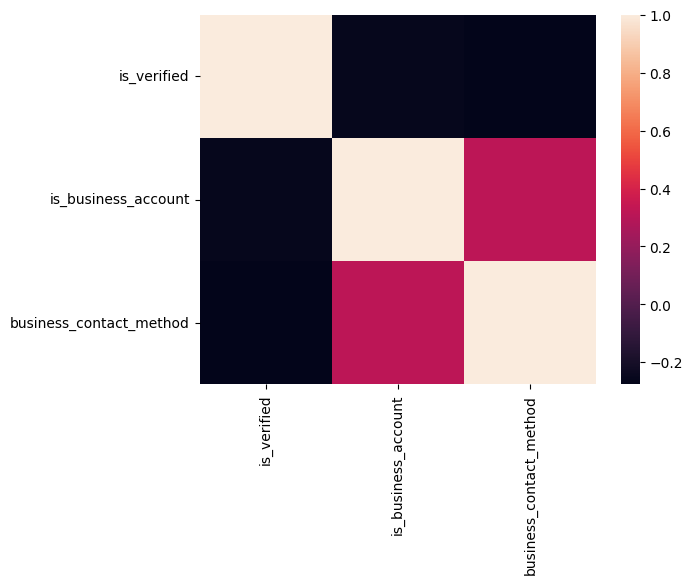

In [20]:
# These values have a extremely good p-value but around 0.21 cramers value.
# Let's see if these values are actually correlated with themselves?
fields = df_profile[['is_verified', 'is_business_account', 'business_contact_method']]
fields['business_contact_method'] = fields['business_contact_method'].apply(lambda x: True if x == 'CALL' else False)

import seaborn as sns

sns.heatmap(fields.corr())

In [21]:
# They are not correlated but their effect is not that significant, let's drop them as well.

df_profile = df_profile.drop(columns=['is_verified','is_business_account','business_contact_method'], errors='ignore')
df_profile

,username,biography,bio_links,category_enum,label
0,deparmedya,#mediaplanning #mediabuying #sosyalmedya,"""[{'title': '', 'lynx_url': 'https://l.instagr...",LOCAL,tech
1,beyazyakaliyiz,Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀,"""[{'title': '', 'lynx_url': 'https://l.instagr...",PERSONAL_BLOG,None
2,kafesfirin,📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...,"""[{'title': '', 'lynx_url': 'https://l.instagr...",BRAND,food
3,vimerang,Dijital İletişim Yönetimi🎬info@vimerang.comq,"""[{'title': '', 'lynx_url': 'https://l.instagr...",VIDEO_CREATOR,tech
4,totalenergies_istasyonlari,TotalEnergies İstasyonları resmi Instagram hes...,"""[{'title': '', 'lynx_url': 'https://l.instagr...",ENERGY_COMPANY,None
...,...,...,...,...,...
5410,herbisiatolye,🌱 Şifalı Bitkiler Atölyesi 🌾\n📲 WhatsApp Sipar...,"""[{'title': '', 'lynx_url': 'https://l.instagr...",HEALTH_BEAUTY,health and lifestyle
5411,nestleturkiye,"117 YILDIR YUVAMIZ TÜRKİYE! \n5 fabrikamız, 30...","""[{'title': 'Amac\u0131m\u0131z ve Hedeflerimi...",FOOD_COMPANY,None
5412,tariszeytinyagi,None,"""[{'title': '', 'lynx_url': 'https://l.instagr...",ACTIVITY_GENERAL,None
5413,iklim_ce,👇👇İklimce Sohbetler’le ilgili her şey,"""[{'title': '', 'lynx_url': 'https://l.instagr...",PERSON,None


In [22]:
import json
import ast
import re

pattern = r"'url':\s*'(.*?)'"


def extract_urls(row):
    out = re.findall(pattern, row)
    return out


df_profile_final = df_profile.copy(True)

df_profile_final["bio_links"] = df_profile["bio_links"].apply(extract_urls)

df_profile_final

,username,biography,bio_links,category_enum,label
0,deparmedya,#mediaplanning #mediabuying #sosyalmedya,[http://www.deparmedya.com/],LOCAL,tech
1,beyazyakaliyiz,Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀,[http://yinemipazartesi.wordpress.com/],PERSONAL_BLOG,None
2,kafesfirin,📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...,[http://www.kafesfirin.com/],BRAND,food
3,vimerang,Dijital İletişim Yönetimi🎬info@vimerang.comq,[http://vimerang.com/],VIDEO_CREATOR,tech
4,totalenergies_istasyonlari,TotalEnergies İstasyonları resmi Instagram hes...,[https://bit.ly/45XDUDr],ENERGY_COMPANY,None
...,...,...,...,...,...
5410,herbisiatolye,🌱 Şifalı Bitkiler Atölyesi 🌾\n📲 WhatsApp Sipar...,[http://www.herbisi.com.tr/],HEALTH_BEAUTY,health and lifestyle
5411,nestleturkiye,"117 YILDIR YUVAMIZ TÜRKİYE! \n5 fabrikamız, 30...",[https://www.nestle.com.tr/hakkimizda],FOOD_COMPANY,None
5412,tariszeytinyagi,None,[http://www.tariszeytin.com.tr],ACTIVITY_GENERAL,None
5413,iklim_ce,👇👇İklimce Sohbetler’le ilgili her şey,[https://linktr.ee/iklim_ce],PERSON,None


In [23]:
# Extract only the text of captions, get rid of the duplicated captions since they would just corrupt the final result.
def extract_captions(row):
    captions = []
    for post in row:
        if "caption" in post:
            caption = post["caption"]
            if caption:
                if not caption in captions:
                    captions.append(caption)

    return captions


df_posts_final = df_posts.copy(True)
df_posts_final["posts"] = df_posts["posts"].apply(extract_captions)
df_posts_final

,username,label,posts
0,deparmedya,tech,"[Cumhuriyetimizin 100.yılı kutlu olsun♾️🇹🇷, Or..."
1,beyazyakaliyiz,None,[Bu diyaloğun yaşanmadığı bir online toplantı ...
2,kafesfirin,food,[Bugün bir fincan köpüklü Türk kahvesiyle taçl...
3,vimerang,tech,[Saygı ve özlemle🖤\n\n#atatürk #10kasım #10kas...
4,totalenergies_istasyonlari,None,[Başöğretmenimiz Gazi Mustafa Kemal Atatürk’ün...
...,...,...,...
5410,herbisiatolye,health and lifestyle,[Gurdjieff kutsal dansları ve öğretisi çalışma...
5411,nestleturkiye,None,[Aramızdan ayrılışının 85. yılında Gazi Mustaf...
5412,tariszeytinyagi,None,"[DÜNYA DİYABET GÜNÜ\n\nŞeker hastalığı, vücudu..."
5413,iklim_ce,None,[Enerji ve Tabii Kaynaklar Bakanlığı’nın açıkl...


In [24]:
# Combine posts and profiles.

df_final = pd.merge(df_profile_final, df_posts_final, how='inner', on=['username','label'])
df_final.to_parquet('data/training-dataset.parquet')
df_final

,username,biography,bio_links,category_enum,label,posts
0,deparmedya,#mediaplanning #mediabuying #sosyalmedya,[http://www.deparmedya.com/],LOCAL,tech,"[Cumhuriyetimizin 100.yılı kutlu olsun♾️🇹🇷, Or..."
1,beyazyakaliyiz,Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀,[http://yinemipazartesi.wordpress.com/],PERSONAL_BLOG,None,[Bu diyaloğun yaşanmadığı bir online toplantı ...
2,kafesfirin,📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...,[http://www.kafesfirin.com/],BRAND,food,[Bugün bir fincan köpüklü Türk kahvesiyle taçl...
3,vimerang,Dijital İletişim Yönetimi🎬info@vimerang.comq,[http://vimerang.com/],VIDEO_CREATOR,tech,[Saygı ve özlemle🖤\n\n#atatürk #10kasım #10kas...
4,totalenergies_istasyonlari,TotalEnergies İstasyonları resmi Instagram hes...,[https://bit.ly/45XDUDr],ENERGY_COMPANY,None,[Başöğretmenimiz Gazi Mustafa Kemal Atatürk’ün...
...,...,...,...,...,...,...
5410,herbisiatolye,🌱 Şifalı Bitkiler Atölyesi 🌾\n📲 WhatsApp Sipar...,[http://www.herbisi.com.tr/],HEALTH_BEAUTY,health and lifestyle,[Gurdjieff kutsal dansları ve öğretisi çalışma...
5411,nestleturkiye,"117 YILDIR YUVAMIZ TÜRKİYE! \n5 fabrikamız, 30...",[https://www.nestle.com.tr/hakkimizda],FOOD_COMPANY,None,[Aramızdan ayrılışının 85. yılında Gazi Mustaf...
5412,tariszeytinyagi,None,[http://www.tariszeytin.com.tr],ACTIVITY_GENERAL,None,"[DÜNYA DİYABET GÜNÜ\n\nŞeker hastalığı, vücudu..."
5413,iklim_ce,👇👇İklimce Sohbetler’le ilgili her şey,[https://linktr.ee/iklim_ce],PERSON,None,[Enerji ve Tabii Kaynaklar Bakanlığı’nın açıkl...


In [25]:
df_biography = df_final[['username','biography']]
df_biography.to_parquet('data/username_biography.parquet')
df_biography

,username,biography
0,deparmedya,#mediaplanning #mediabuying #sosyalmedya
1,beyazyakaliyiz,Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀
2,kafesfirin,📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...
3,vimerang,Dijital İletişim Yönetimi🎬info@vimerang.comq
4,totalenergies_istasyonlari,TotalEnergies İstasyonları resmi Instagram hes...
...,...,...
5410,herbisiatolye,🌱 Şifalı Bitkiler Atölyesi 🌾\n📲 WhatsApp Sipar...
5411,nestleturkiye,"117 YILDIR YUVAMIZ TÜRKİYE! \n5 fabrikamız, 30..."
5412,tariszeytinyagi,None
5413,iklim_ce,👇👇İklimce Sohbetler’le ilgili her şey


In [26]:
dict_username_post = []

for index, row in df_final.iterrows():

    username = row["username"]
    for post in row["posts"]:
        if not post:
            print(row['posts'])

        data = (username, post)
        dict_username_post.append(data)

df_username_caption = pd.DataFrame(dict_username_post, columns=['username','caption'])
df_username_caption.to_parquet('data/username_caption.parquet')
df_username_caption

,username,caption
0,deparmedya,Cumhuriyetimizin 100.yılı kutlu olsun♾️🇹🇷
1,deparmedya,Oriflame Duologi Lansmanı #isveçtengelengüzell...
2,deparmedya,#oriflameilesaçbakımdevrimi ✌️
3,deparmedya,✌️#oriflameilesaçbakımdevrimi 07Agustos’23 ori...
4,deparmedya,07 Agustos’23 #oriflameturkiye #duoloji
...,...,...
173065,tetrancaffeine,Alışılmışın Dışına Çık!\n\n📍İşçi Blokları mh. ...
173066,tetrancaffeine,Bayramınız Kutlu olsun🥳🤩
173067,tetrancaffeine,Ben Bir Kahve Aşığıyım!\n\nİddialı Kahvelerin ...
173068,tetrancaffeine,"Sonuçlar 332plus sayfasından,11.05.2021 tarihi..."
